# Bike Sharing Adding libraries

In [1]:
!pip install xgboost

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor


%matplotlib inline

In [3]:
##Connecting to AWS s3 bucket 

In [4]:
df = pd.read_csv('s3://bike-sharing-om/data/train.csv')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
# Adding time and month to the dataframe using datatime column
from datetime import datetime

hour=[]
day=[]
month=[]

for i in df['datetime']:
    date = datetime.strptime(i,"%Y-%m-%d %H:%M:%S")
    hour.append(date.hour)
    day.append(date.weekday())
    month.append(date.month)
    
df['hour'] = pd.DataFrame(hour).astype(int)
df['day'] = pd.DataFrame(day).astype(int)
df['month'] = pd.DataFrame(month).astype(int)

# Dropping datetime column
df.drop('datetime',axis=1,inplace=True)

In [8]:
##Getting all percentile (25 percentile, 50 percentile, 75 percentile)

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,3.013963,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,2.004585,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,12.000000


In [10]:
##Finding all unique data 

In [11]:
df.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
hour           24
day             7
month          12
dtype: int64

In [12]:
df['season'].unique()

array([1, 2, 3, 4])

In [13]:
##Removing all null values

In [14]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
dtype: int64

In [15]:
##Checking for outliers 

<AxesSubplot:>

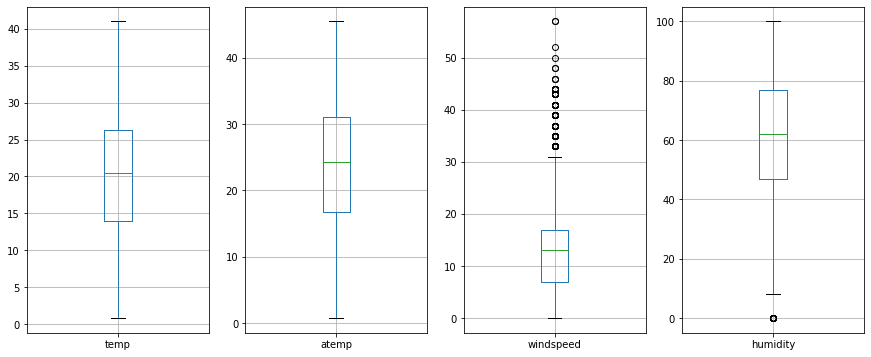

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(141)
df.boxplot(column=["temp"])
plt.subplot(142)
df.boxplot(column=["atemp"])
plt.subplot(143)
df.boxplot(column=["windspeed"])
plt.subplot(144)
df.boxplot(column=["humidity"])

In [17]:
##Here windspeed and humidity have outliers have, thus removing them. 

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [19]:
##Using IQR method to remove detect and remove outliers

In [20]:
low_humidity,up_humidity = remove_outlier(df['humidity'])
df['humidity'] = np.where(df['humidity']>up_humidity,up_humidity,df['humidity'])
df['humidity'] = np.where(df['humidity']<low_humidity,low_humidity,df['humidity'])

low_windspeed,up_windspeed = remove_outlier(df['windspeed'])
df['windspeed'] = np.where(df['windspeed']>up_windspeed,up_windspeed,df['windspeed'])
df['windspeed'] = np.where(df['windspeed']<low_windspeed,low_windspeed,df['windspeed'])

<AxesSubplot:>

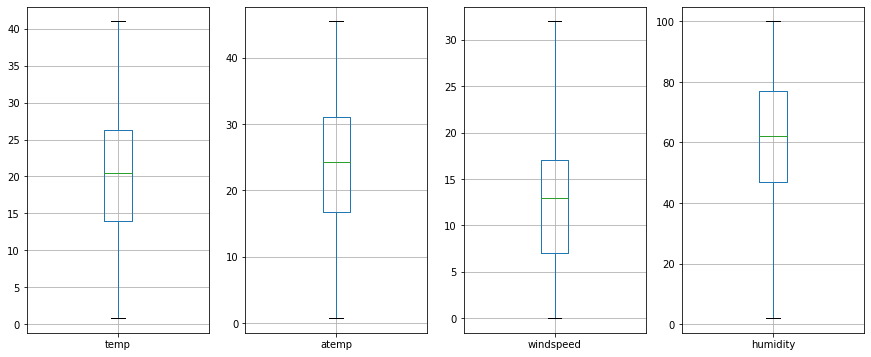

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(141)
df.boxplot(column=["temp"])
plt.subplot(142)
df.boxplot(column=["atemp"])
plt.subplot(143)
df.boxplot(column=["windspeed"])
plt.subplot(144)
df.boxplot(column=["humidity"])

In [22]:
##Outliers removed

<AxesSubplot:>

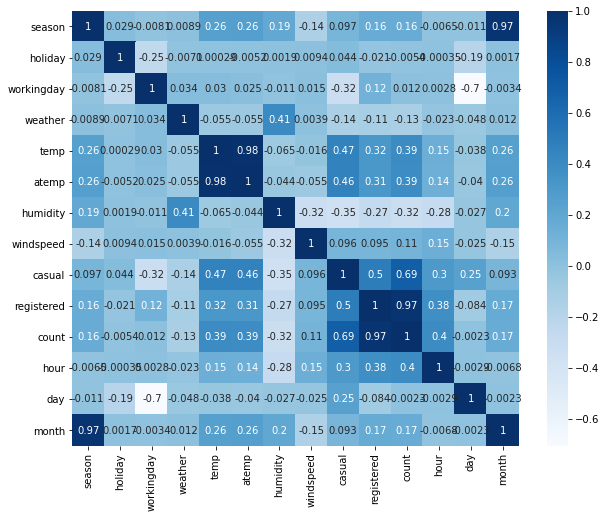

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [24]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.890502,12.703540,36.021955,155.552177,191.574132,11.541613,3.013963,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.232240,7.882794,49.960477,151.039033,181.144454,6.915838,2.004585,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,31.992500,367.000000,886.000000,977.000000,23.000000,6.000000,12.000000


## WEEK 2

## Data visualisation

In [25]:
#sns.pairplot(df)

In [26]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,5,1
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2,5,1
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,3,5,1
4,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,4,5,1


In [27]:
import matplotlib.patheffects as path_effects
def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

<function matplotlib.pyplot.show(close=None, block=None)>

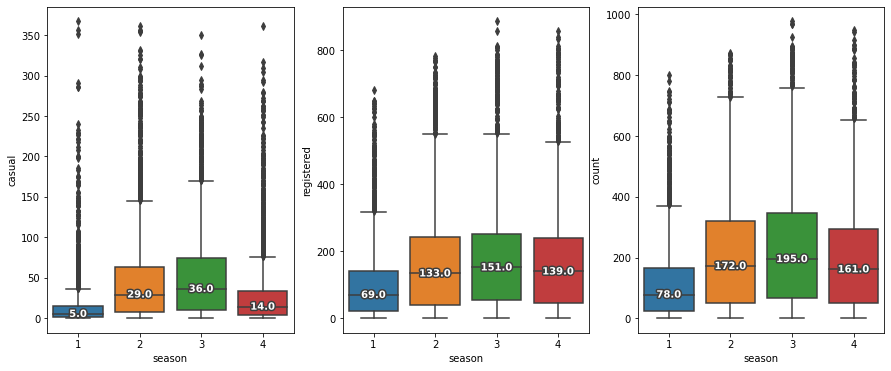

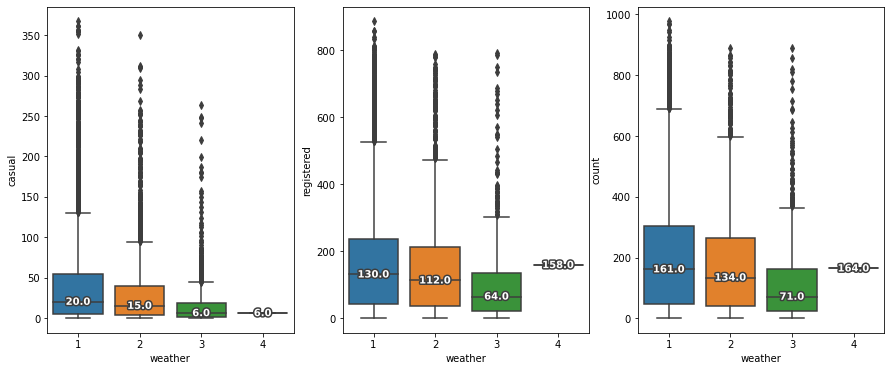

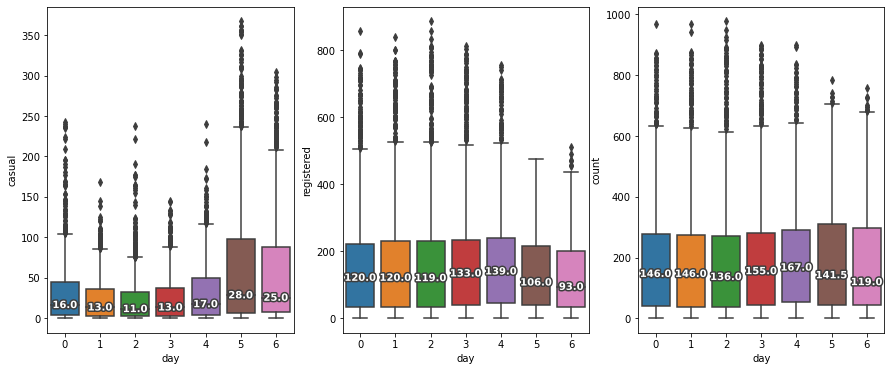

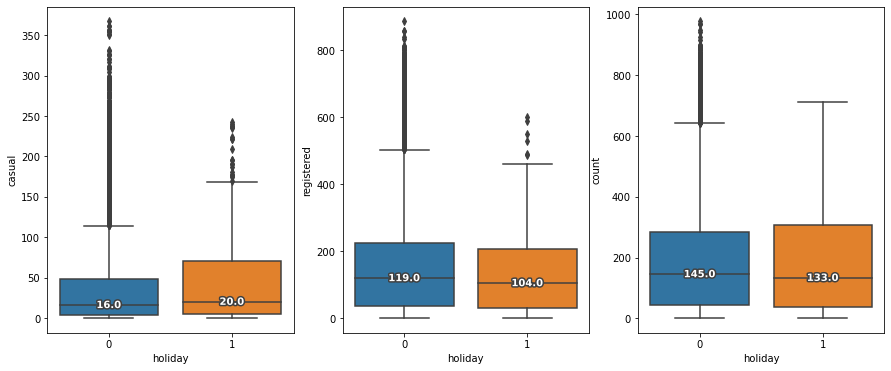

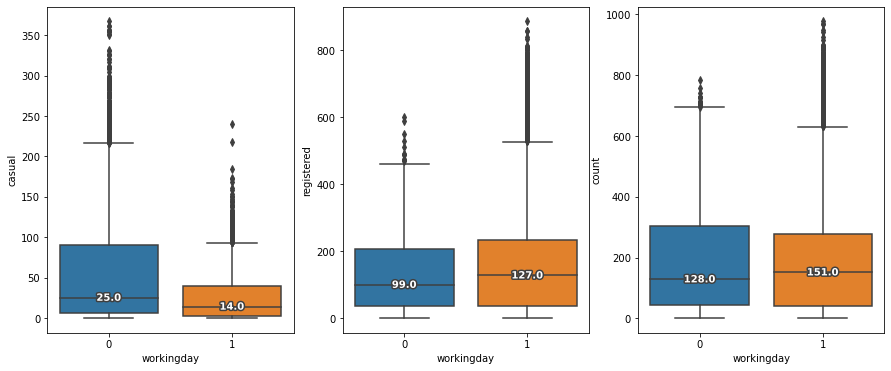

In [28]:
cols = ['season','weather','day','holiday','workingday']
cols2 = ['casual','registered','count']
for col in cols:
    plt.figure(figsize=(15,6))
    for i,v in enumerate(cols2):
        plt.subplot(131+i)
        box_plot = sns.boxplot(x=col,y=v,data=df)
        add_median_labels(box_plot.axes)
plt.show

<AxesSubplot:xlabel='hour', ylabel='count'>

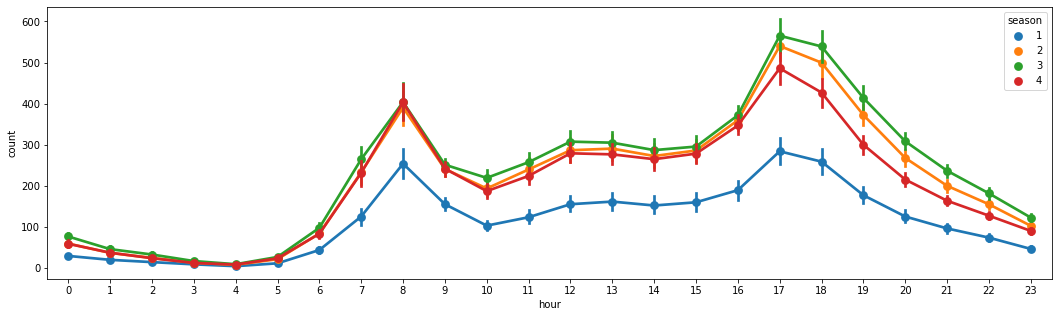

In [29]:
# Seasons: 1 = spring, 2 = summer, 3 = fall, 4 = winter

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=df['hour'], y=df['count'],hue=df['season'], ax=ax)

<AxesSubplot:xlabel='hour', ylabel='count'>

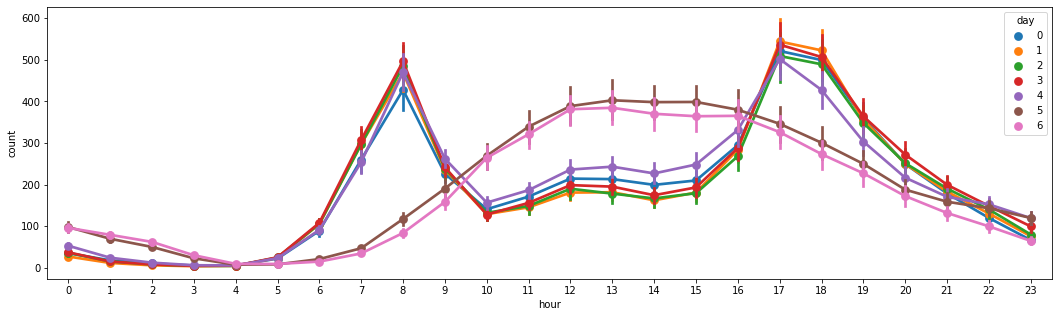

In [30]:
# Day: 0(Monday)-6(Sunday)

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=df['hour'], y=df['count'],hue=df['day'], ax=ax)

<AxesSubplot:xlabel='hour', ylabel='count'>

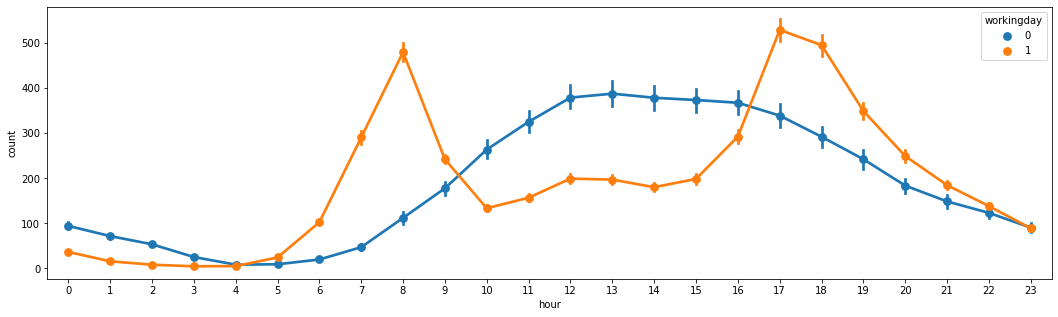

In [31]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=df['hour'], y=df['count'],hue=df['workingday'], ax=ax)

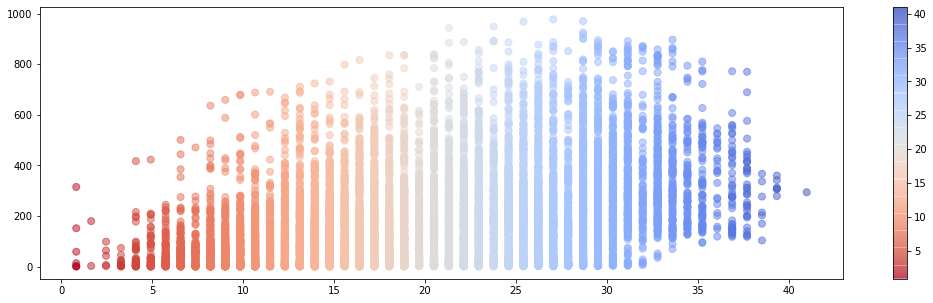

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
cmap = sns.color_palette("coolwarm_r", as_cmap=True)
points = ax.scatter(df['temp'], df['count'], c=df['temp'], s=50, cmap=cmap,alpha=0.5)
fig.colorbar(points)

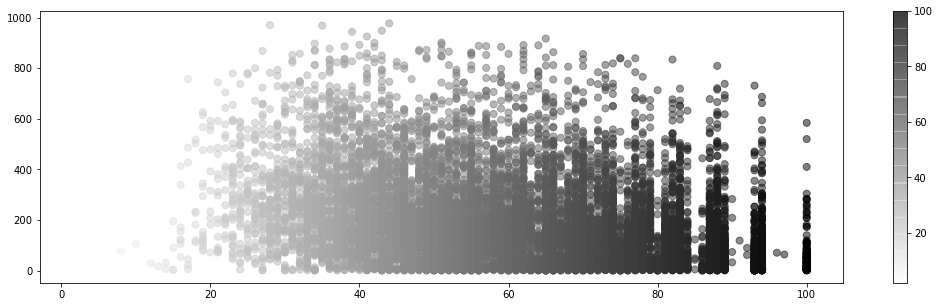

In [33]:
fig, ax = plt.subplots(figsize=(18, 5))
cmap = sns.color_palette("binary", as_cmap=True)
points = ax.scatter(df['humidity'], df['count'], c=df['humidity'], s=50, cmap=cmap,alpha=0.5)
fig.colorbar(points)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

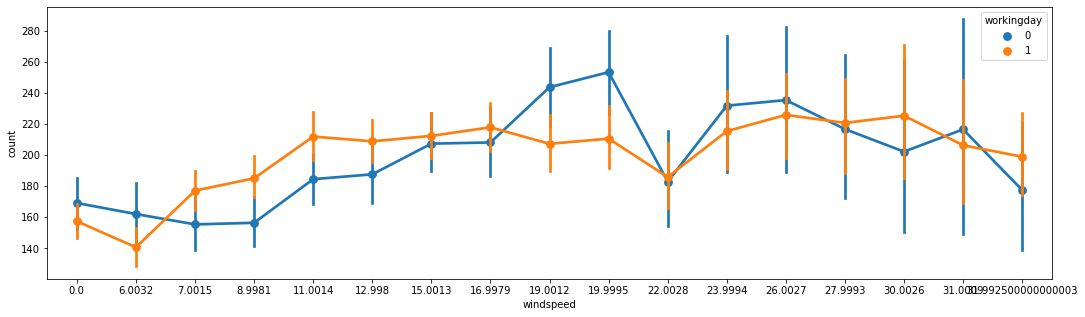

In [34]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=df['windspeed'], y=df['count'],hue=df['workingday'], ax=ax)

<AxesSubplot:xlabel='humidity', ylabel='count'>

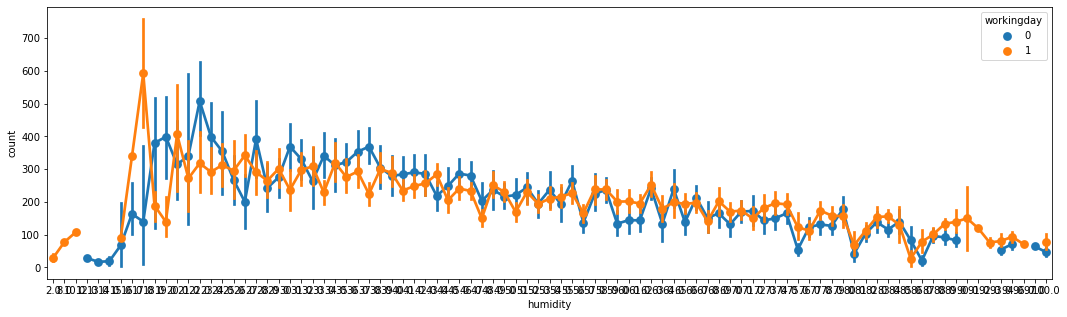

In [35]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=df['humidity'], y=df['count'],hue=df['workingday'], ax=ax)

### Feature Selection

[0.19612912 0.00547509 0.00490971 0.00768561 0.06373804 0.05073971
 0.02031793 0.01131798 0.01182004 0.00877035 0.00947392 0.00983441
 0.01259138 0.58719671]


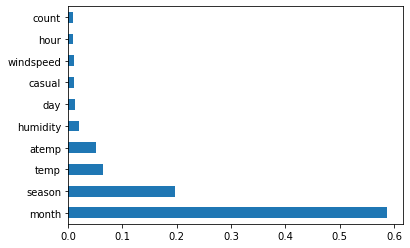

In [36]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

         Specs          Score
10       count  137133.401856
9   registered   84357.926568
8       casual   81403.467731
4         temp   24742.748466


In [38]:
# Adding a feature "peak"
df['peak'] = df[['hour','workingday']].apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] in [8,17,18])) or (df['workingday'] == 0 and 11 <= df['hour'] and df['hour'] <= 17)) else 0, axis = 1)

In [39]:
# Normalizing data (min-max normalization)
ndf=(df-df.min())/(df.max()-df.min())
ndf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,peak
0,0.0,0.0,0.0,0.0,0.224490,0.305068,0.806122,0.0,0.008174,0.014673,0.015369,0.000000,0.833333,0.0,0.0
1,0.0,0.0,0.0,0.0,0.204082,0.288064,0.795918,0.0,0.021798,0.036117,0.039959,0.043478,0.833333,0.0,0.0
2,0.0,0.0,0.0,0.0,0.204082,0.288064,0.795918,0.0,0.013624,0.030474,0.031762,0.086957,0.833333,0.0,0.0
3,0.0,0.0,0.0,0.0,0.224490,0.305068,0.744898,0.0,0.008174,0.011287,0.012295,0.130435,0.833333,0.0,0.0
4,0.0,0.0,0.0,0.0,0.224490,0.305068,0.744898,0.0,0.000000,0.001129,0.000000,0.173913,0.833333,0.0,0.0


In [40]:
x_train = ndf.drop(['casual','registered','count'], axis=1)
y_train_c = ndf['casual']
y_train_r = ndf['registered']

In [41]:
sel1 = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel1.fit(x_train, y_train_c)

SelectFromModel(estimator=RandomForestRegressor())

In [42]:
(sel1.get_support())

array([False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True])

In [43]:
sel1.estimator_.feature_importances_

array([0.00748769, 0.00383119, 0.13666363, 0.00786813, 0.15036657,
       0.13267643, 0.07426773, 0.02716909, 0.14051636, 0.04857658,
       0.02676755, 0.24380905])

In [44]:
selected_feat= x_train.columns[(sel1.get_support())]
print(selected_feat)


Index(['workingday', 'temp', 'atemp', 'hour', 'peak'], dtype='object')


<AxesSubplot:>

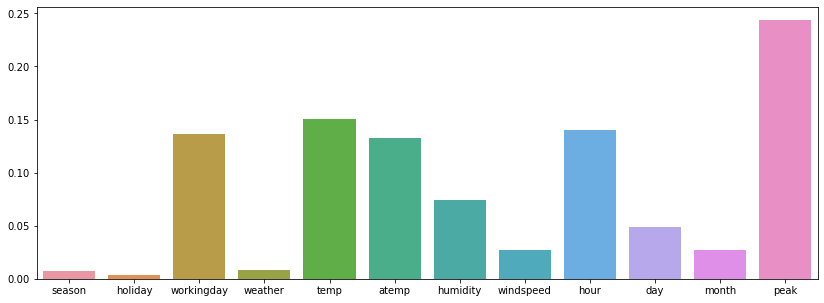

In [45]:
plt.subplots(figsize=(14, 5))
sns.barplot(x=x_train.columns,y=sel1.estimator_.feature_importances_)

In [46]:
sel2 = SelectFromModel(RandomForestRegressor(n_estimators = 10))
sel2.fit(x_train, y_train_r)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=10))

In [47]:
selected_feat= x_train.columns[(sel2.get_support())]
print(selected_feat)

Index(['workingday', 'hour', 'peak'], dtype='object')


<AxesSubplot:>

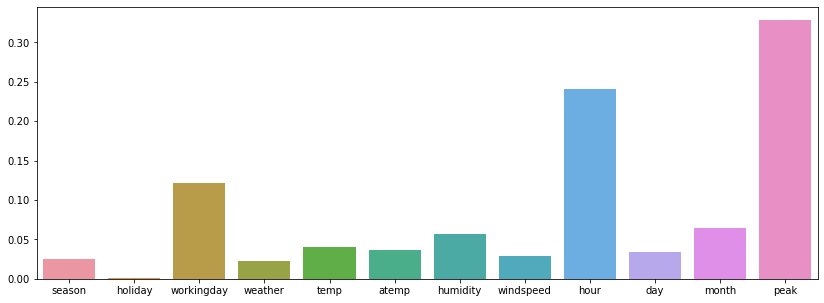

In [48]:
plt.subplots(figsize=(14, 5))
sns.barplot(x=x_train.columns,y=sel2.estimator_.feature_importances_)

# Week 4

### Importing all libraries

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Splitting data in 80-20 ratio

In [50]:
x = df.drop(["casual","registered","count"], axis=1)
y = df['casual']
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)
x_train.shape, x_test.shape

((8708, 12), (2178, 12))

## Casual 

In [51]:
def rmse(y_pred, y_actual):
    diff = y_pred - y_actual
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

#### Random Forest Regressor

In [52]:
# Decision Trees
model = RandomForestRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))


RMSE: 15.99856208665747


## Trying them out 

In [53]:
model.predict(np.array([[4,1,0,1,20.0,22.0,40.0,10.0,7,0,7,1]]))

array([150.21333333])

In [54]:
#xgb_model.predict(np.array([np.array([3]), np.array([0]), np.array([1])[4], np.array([8]), np.array([10]), np.array([80]), [10], [17], [8], [7], [1]]))

#model.predict(np.array([np.array([3]),np.array([0]),np.array([1]),np.array([4]),np.array([8.0]),np.array([10.0]),np.array([80.0]),np.array([10.0]),np.array([17]),np.array([8]),np.array([7]),np.array([1])]))

#### Decision Tree Regressor

In [55]:
# Decision Trees
model = DecisionTreeRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 23.977750246573432


#### XGBoost

In [56]:
# XGBoost
model = XGBRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 15.302581523472151


#### Gradient Boosting Regressor

In [57]:
# Gradient Boost
model = GradientBoostingRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 19.850033860453944


#### Ada Boost Regressor

In [58]:
# Adaptive Boost
model = AdaBoostRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 33.292397544096595


#### Logistic regressor

In [59]:
# Logistic Regressor
model = LogisticRegression()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 45.8233422619021


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Cross validation


In [60]:
results = []

In [61]:
# Random Forest Regression
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', RandomForestRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('RandomForestRegressor',s_mean))


Mean RMSE: 16.730791399826753


In [62]:
# Decision Tree Regressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', DecisionTreeRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('DecisionTreeRegressor',s_mean))

Mean RMSE: 23.124623166051272


In [63]:
# XG Boost
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', XGBRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('XGBRegressor',s_mean))

Mean RMSE: 16.492767676307857


In [64]:
# Gradient Boosting Regressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', GradientBoostingRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('GradientBoostingRegressor',s_mean))

Mean RMSE: 20.912312802484887


In [65]:
# AdaBoostRegressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', AdaBoostRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('AdaBoostRegressor',s_mean))

Mean RMSE: 32.71970562169123


In [66]:
results

[('RandomForestRegressor', 16.730791399826753),
 ('DecisionTreeRegressor', 23.124623166051272),
 ('XGBRegressor', 16.492767676307857),
 ('GradientBoostingRegressor', 20.912312802484887),
 ('AdaBoostRegressor', 32.71970562169123)]

In [67]:
results.sort(key = lambda x:x[1])

In [68]:
results

[('XGBRegressor', 16.492767676307857),
 ('RandomForestRegressor', 16.730791399826753),
 ('GradientBoostingRegressor', 20.912312802484887),
 ('DecisionTreeRegressor', 23.124623166051272),
 ('AdaBoostRegressor', 32.71970562169123)]

In [69]:
rdf = pd.DataFrame(results)
rdf

,0,1
0,XGBRegressor,16.492768
1,RandomForestRegressor,16.730791
2,GradientBoostingRegressor,20.912313
3,DecisionTreeRegressor,23.124623
4,AdaBoostRegressor,32.719706


### Registered


In [70]:
x = df.drop(['casual','registered','count'], axis=1)
y = df['registered']

#### Random Forest Regressor


In [71]:
# Adaptive Boost
model = RandomForestRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 15.90402142082581


#### Decision Tree Regressor

In [72]:
# Adaptive Boost
model = DecisionTreeRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 24.087309145930842


#### XBoost

In [73]:
# XGBoost
model = XGBRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 15.302581523472151


#### Gradient Boosting Regressor

In [74]:
# Gradient Boost
model = GradientBoostingRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 19.845119558994647


#### Ada Boost Regressor

In [75]:
# Adaptive Boost
model = AdaBoostRegressor()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 33.658131133973264


#### Logistic Rgressor

In [76]:
# Logistic Regressor
model = LogisticRegression()

# training model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("RMSE:",rmse(y_pred,y_test))

RMSE: 45.8233422619021


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Cross Validation

In [77]:
results = []

In [78]:
# Random Forest Regression
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', RandomForestRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('RandomForestRegressor',s_mean))


Mean RMSE: 57.25422245901471


In [79]:
# Decision Tree Regressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', DecisionTreeRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('DecisionTreeRegressor',s_mean))

Mean RMSE: 77.02946434142457


In [80]:
# XG Boost
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', XGBRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('XGBRegressor',s_mean))

Mean RMSE: 53.88326039657913


In [81]:
# Gradient Boosting Regressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', GradientBoostingRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('GradientBoostingRegressor',s_mean))

Mean RMSE: 66.14550686184108


In [82]:
# AdaBoostRegressor
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', AdaBoostRegressor())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# for Cross validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Training, predicting and getting scores
scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

# Making error positive
scores = np.absolute(scores)

# Getting mean of all errors
s_mean = np.mean(scores)
print('Mean RMSE: ' + str(s_mean))

results.append(('AdaBoostRegressor',s_mean))

Mean RMSE: 93.93568132363139


In [83]:
results

[('RandomForestRegressor', 57.25422245901471),
 ('DecisionTreeRegressor', 77.02946434142457),
 ('XGBRegressor', 53.88326039657913),
 ('GradientBoostingRegressor', 66.14550686184108),
 ('AdaBoostRegressor', 93.93568132363139)]

In [84]:
results.sort(key = lambda x:x[1])

In [85]:
results

[('XGBRegressor', 53.88326039657913),
 ('RandomForestRegressor', 57.25422245901471),
 ('GradientBoostingRegressor', 66.14550686184108),
 ('DecisionTreeRegressor', 77.02946434142457),
 ('AdaBoostRegressor', 93.93568132363139)]

In [86]:
rdf = pd.DataFrame(results)
rdf

,0,1
0,XGBRegressor,53.883260
1,RandomForestRegressor,57.254222
2,GradientBoostingRegressor,66.145507
3,DecisionTreeRegressor,77.029464
4,AdaBoostRegressor,93.935681


## Summary
From the above Registered and casual predictions we performed, we could see that XGB Regressor is performing the best with the least score out of all the algorithms applied

#### Cross Validation different method (tried for registered only

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(RandomForestRegressor(), x_test, y_test,cv=3)

array([0.8139326 , 0.82966086, 0.85587031])

In [89]:
cross_val_score(DecisionTreeRegressor(), x_test, y_test,cv=3)

array([0.68433446, 0.71181263, 0.67926105])

In [90]:
cross_val_score(XGBRegressor(), x_test, y_test,cv=3)

array([0.78696397, 0.8170247 , 0.84559494])

In [91]:
cross_val_score(GradientBoostingRegressor(), x_test, y_test,cv=3)

array([0.804928  , 0.81125455, 0.82775958])

In [92]:
cross_val_score(AdaBoostRegressor(), x_test, y_test,cv=3)

array([0.55998366, 0.69221186, 0.6468876 ])

## Week 5: Hyperparameter Tuning 

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [94]:
x = df.drop(['casual','registered','count'], axis=1)
y = df['casual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [95]:
xgb_r = XGBRegressor()

xgb_params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xgb_model = RandomizedSearchCV(estimator = xgb_r, param_distributions = xgb_params, cv=5, n_iter = 100, verbose=2)
xgb_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.4s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.5s
[CV] END colsample_bytree=0

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [96]:
print('Best Parameter:', xgb_model.best_params_)
y_pred = xgb_model.predict(x_test)
rmse(y_pred,y_test)

Best Parameter: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


14.639355640139083

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 600, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [98]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=5, n_iter = 10, verbose=2, random_state=42)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.7s
[CV] END max_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 111, 172, 233, 294,
                                                         355, 416, 477, 538,
                                                         600]},
                   random_state=42, verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 416,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 60}

In [100]:
y_pred = rf_random.predict(x_test)
rmse(y_pred,y_test)

15.87811451203691

In [101]:
x = df.drop(['casual','registered','count'], axis=1)
y = df['registered']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [102]:
xgb_r = XGBRegressor()

xgb_params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xgb_model = RandomizedSearchCV(estimator = xgb_r, param_distributions = xgb_params, cv=5, n_iter = 100, verbose=2)
xgb_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.5, ga

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [103]:
print('Best Parameter:', xgb_model.best_params_)
y_pred = xgb_model.predict(x_test)
rmse(y_pred,y_test)

Best Parameter: {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.7}


56.36275955416527

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 600, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [105]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=5, n_iter = 10, verbose=2, random_state=42)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   4.9s
[CV] END max_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 111, 172, 233, 294,
                                                         355, 416, 477, 538,
                                                         600]},
                   random_state=42, verbose=2)

In [106]:
rf_random.best_params_

{'n_estimators': 416,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 60}

In [107]:
y_pred = rf_random.predict(x_test)
rmse(y_pred,y_test)

59.980150424690414